In [10]:
# import the necessaries modules
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

sns.set(style = "whitegrid")

In [11]:
# Load the csv file for inbound arrivals in Haiti
df=pd.read_csv("UN_tourism_inbound_Arrivals_haiti_cleaned.csv")
df.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,unit_thousand_trips
0,excursionists,Haiti,World,1995,225.0,thousand trips
1,excursionists,Haiti,World,1996,250.0,thousand trips
2,excursionists,Haiti,World,1997,238.0,thousand trips
3,excursionists,Haiti,World,1998,246.0,thousand trips
4,excursionists,Haiti,World,1999,243.0,thousand trips


In [253]:
""" 
Multiply the  "number_of_tourist" column by 1000 to convert the values from thousands trips
into full numeric values and delete the column "unit_thousand_trips"
"""
df["number_of_tourist"] = df["number_of_tourist"].astype(str)
df["number_of_tourist"] = df["number_of_tourist"].str.replace("thousand trips", "", regex=False).str.strip()
df["number_of_tourist"] = df["number_of_tourist"].astype(float)
df["number_of_tourist"] = df["number_of_tourist"] * 1000
df = df.drop(columns=["unit_thousand_trips"], errors="ignore")
df.head()


,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,crisis
0,excursionists,Haiti,World,1995,225000.0,0
1,excursionists,Haiti,World,1996,250000.0,0
2,excursionists,Haiti,World,1997,238000.0,0
3,excursionists,Haiti,World,1998,246000.0,0
4,excursionists,Haiti,World,1999,243000.0,0


In [14]:
"""
convert "year" to binary to calculate the correlation between the years of crisis in Haiti 
and inbound arrivals tourist in the country. 0:no crisis, 1: year of crisis
"""
crisis_years =[2004,2008,2010,2016,2018,2019,2020,2021,2022,2023,2024]
df["crisis"] = df["year"].apply(lambda x:1 if x in crisis_years else 0)

In [257]:
df.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,crisis
0,excursionists,Haiti,World,1995,225000.0,0
1,excursionists,Haiti,World,1996,250000.0,0
2,excursionists,Haiti,World,1997,238000.0,0
3,excursionists,Haiti,World,1998,246000.0,0
4,excursionists,Haiti,World,1999,243000.0,0


In [16]:
df["crisis"].unique()

array([0, 1], dtype=int64)

In [26]:
""" correlation between crisis years(political crisis,natural disasters and COVID-19 ) and 
the numbers of tourists arriving in Haiti, based on visitors types: excursionnists(cruise passengers who do not 
stay overnight in the country), tourists(arriving by other types of transportation and staying
at least one night) and total visitors))
"""
categories = df["type_of_visitors"].unique()

for cat in categories:
    subset = df[df["type_of_visitors"] == cat]
    corr = subset["number_of_tourist"].corr(subset["crisis"])
    print(f"Correlation for – {cat} : {corr}")
    
# Correlation Analysis

Correlation for – excursionists : 0.20224224069167163
Correlation for – tourists : 0.03986233352110226
Correlation for – visitors_total : 0.04936525451492305


# Correlation Analysis
 1. **Excursionists** 
* Highest correlation of the three categories: 0.202
* Still weak, but more noticeable
* Excursionists (cruise passengers who don't stay overnight) appear slightly more sensitive to crises in Haiti

2. **Tourists** 
* Practically no correlation or very weak correlation: 0.040
* Tourists who stay at least one night seem largely unaffected by crises
* It's a more resilient tourism segment
3. **Total Visitors** 
*  combined result of both categories:0.049
  Confirms that overall, crises don't have a strong, measurable linear impact on Haitian tourism according to our dataset.

**General Conclusion:**
Crises in Haiti (political, natural disasters, COVID-19) have a limited and non-significant impact on tourist arrivals according to our correlation analysis. However, the effect is slightly more visible for excursionists, suggesting this segment is more volatile.However, the over-night tourists shows a weaker correlation what demonstrate a more resilient segment for the tourism sector.  That doesn't mean that crisis has no effect on inbound tourists in Haiti. But, it shows that the relation is not linear. 

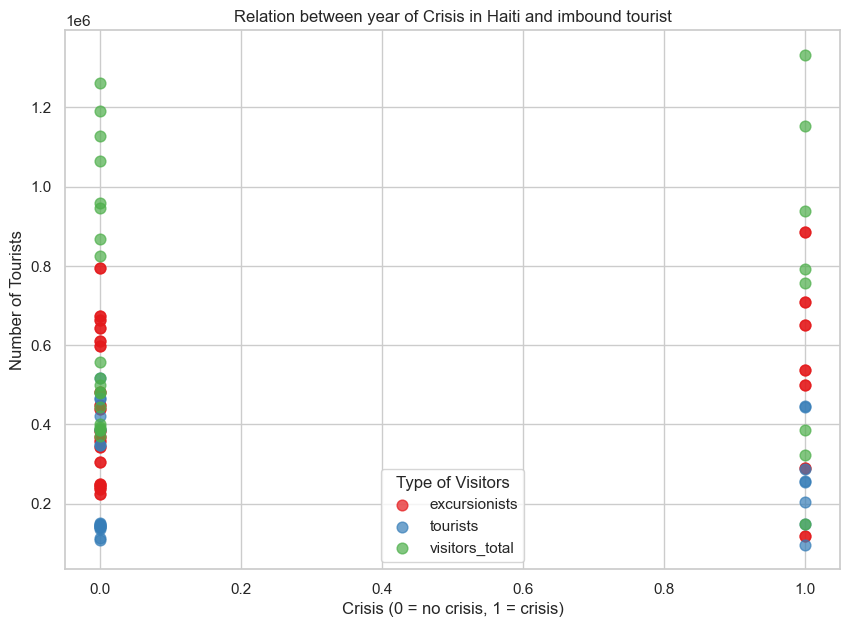

In [267]:
"""
Create a scatterplot to show the relationship between crisis years in Haiti and the number of inbound tourists
Each category of "type_of_visistors" is plotted with a different color to allow comparizon between groups
such as excursionnnists, tourists and total visitors
"""
plt.figure(figsize=(10,7))

categories = df["type_of_visitors"].unique()

colors = plt.cm.Set1(range(len(categories)))

for color, cat in zip(colors, categories):
    subset = df[df["type_of_visitors"] == cat]
    plt.scatter(
        subset["crisis"],
        subset["number_of_tourist"],
        label=cat,
        alpha=0.7,
        s=60,
        color=color
    )

plt.xlabel("Crisis (0 = no crisis, 1 = crisis)")
plt.ylabel("Number of Tourists")
plt.title("Relation between year of Crisis in Haiti and imbound tourist")
plt.legend(title="Type of Visitors")
plt.grid(True)
plt.show()


# Visual and Statistical Analysis of Crisis Impact on Haiti Tourism

**Correlation Results:**
Excursionists: 0.202 (weak positive)
Tourists: 0.040 (negligible)
Visitors_total: 0.049 (negligible)

## What the Scatter Plot Shows:

**Visual Patterns:**
Vertical Alignment at x = 0 and x = 1

Distribution Comparison:
Left column (crisis = 0): Wide spread from 0.4 to 1.2+ million tourists
Right column (crisis = 1): Similar spread, ranging from 0.5 to 1.3+ million tourists

**Key observation:** The distributions overlap significantly, showing that tourist numbers
during crisis years are not dramatically different from non-crisis years

**Weak Linear Relationship**
* The scatter plot visually confirms the low correlations (0.040-0.202)
* Tourist arrivals occur at similar levels whether there's a crisis or not.
* No clear downward trend during crisis periods
* Both crisis and non-crisis years show similar ranges of tourist numbers
This suggests other factors (marketing, global economy) are more influential than the simple presence or absence of a crisis

**Resilience of Haiti Tourism**
Despite frequent crises (political instability, natural disasters, COVID-19), tourist arrivals remain relatively stable in Haiti

Statistical Conclusion:
* The data does NOT show a strong, statistically significant relationship between crisis years and tourist arrivals in Haiti. While crisis may have short-term impacts, the overall pattern suggests that:
* Tourism fluctuations are driven by multiple factors beyond just crisis events
* The binary classification (crisis/no crisis) may be too simplistic to capture the nuanced reality
* Some tourist segments are resilient to political and natural crises

In [213]:
# calculate the T-test and the P-value for excursionists
from scipy.stats import ttest_ind

# Filter the excursionists
df_total = df[df["type_of_visitors"] == "excursionists"]

# Separate each group
group_crisis = df_total[df_total["crisis"] == 1]["number_of_tourist"]
group_no_crisis = df_total[df_total["crisis"] == 0]["number_of_tourist"]

# T-test
t_stat, p_value = ttest_ind(group_crisis, group_no_crisis, equal_var=False)

print("T-test excursionists")
print("t-stat:", t_stat)
print("p-value:", p_value)

T-test excursionists
t-stat: 1.245934417852748
p-value: 0.2287480464040128


In [30]:
# calculate the T-test and the P-value for tourists
from scipy.stats import ttest_ind

# Filter the tourists
df_total = df[df["type_of_visitors"] == "tourists"]

# Separate each group
group_crisis = df_total[df_total["crisis"] == 1]["number_of_tourist"]
group_no_crisis = df_total[df_total["crisis"] == 0]["number_of_tourist"]

# T-test
t_stat, p_value = ttest_ind(group_crisis, group_no_crisis, equal_var=False)

print("T-test tourists")
print("t-stat:", t_stat)
print("p-value:", p_value)

T-test tourists
t-stat: 0.21260135685211506
p-value: 0.8344401396757445


In [277]:
df_total.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,crisis
26,tourists,Haiti,World,1995,145000.0,0
27,tourists,Haiti,World,1996,150000.0,0
28,tourists,Haiti,World,1997,149000.0,0
29,tourists,Haiti,World,1998,147000.0,0
30,tourists,Haiti,World,1999,143000.0,0


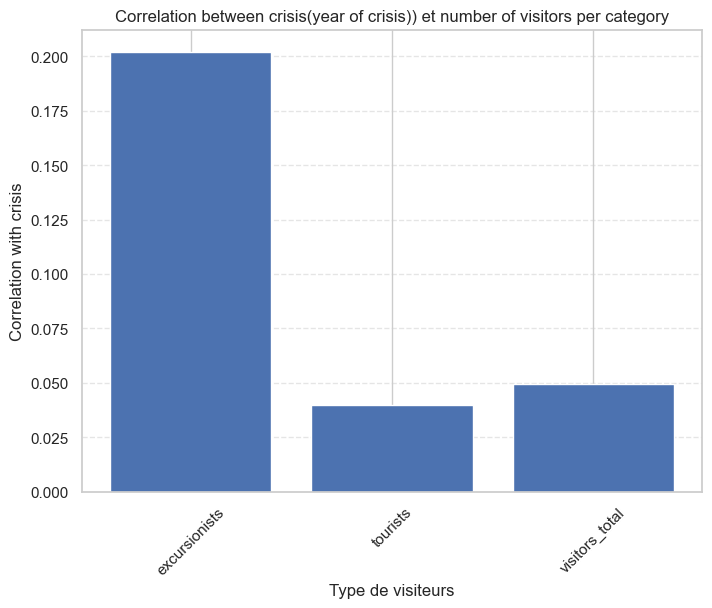

In [275]:
# Calculate the corrélations
categories = df["type_of_visitors"].unique()
correlations = {}

for cat in categories:
    subset = df[df["type_of_visitors"] == cat]
    corr = subset["number_of_tourist"].corr(subset["crisis"])
    correlations[cat] = corr

# create the barplot
plt.figure(figsize=(8,6))
plt.bar(correlations.keys(), correlations.values())

plt.xlabel("Type de visiteurs")
plt.ylabel("Correlation with crisis")
plt.title("Correlation between crisis(year of crisis)) et number of visitors per category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

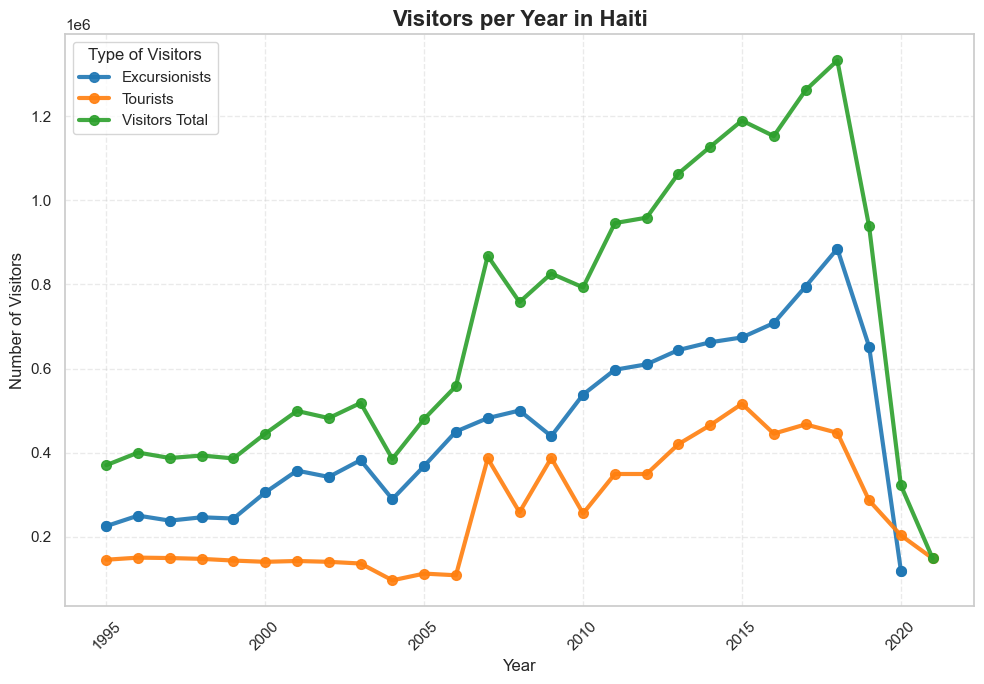

In [273]:
""""
craete the graphic to show the trend for tourists, excursionnists and total_visitors 
from 1995 to 2024
"""

plt.figure(figsize=(10,7))

# Définir une palette moderne
colors = {
    "excursionists": "#1f77b4",   # bleu
    "tourists": "#ff7f0e",        # orange
    "visitors_total": "#2ca02c"   # vert
}

# Boucle pour éviter la répétition
for cat in ["excursionists", "tourists", "visitors_total"]:
    subset = df[df["type_of_visitors"] == cat].sort_values("year")
    
    plt.plot(
        subset["year"],
        subset["number_of_tourist"],
        label=cat.replace("_", " ").title(),
        linewidth=3,
        marker="o",
        markersize=7,
        alpha=0.9,
        color=colors[cat]
    )

# Améliorations visuelles
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)
plt.title("Visitors per Year in Haiti", fontsize=16, fontweight="bold")

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Type of Visitors", fontsize=11)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()